## SVM Exercise

In [19]:
# import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

In [21]:
irisdata['target']= irisdata['Class'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


* create X, y

In [22]:
X = irisdata.iloc[:,:4]
Y = irisdata['target']


* import train_test_split and split data

In [29]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=87)
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)

* import SVC from sklearn and use Polynomial kernel

Kernel "poly" : 
The accurace for this model is :0.9333333333333333 

Kernel "sigmoid" : 
The accurace for this model is :0.8 

Kernel "rbf" : 
The accurace for this model is :0.9 



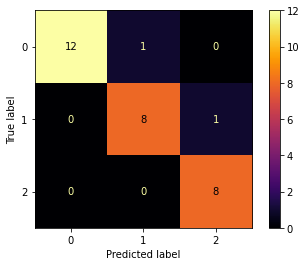

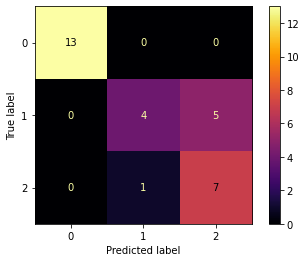

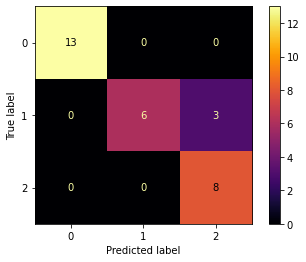

In [35]:
kernels = ['poly','sigmoid','rbf']

acc = []

for i in kernels:
    svc = SVC(kernel=i)
    svc.fit(X_train_norm,y_train)
    y_pred = svc.predict(X_test_norm)
    acc.append(svc.score(X_test_norm,y_test))
    c_matrix = confusion_matrix(y_test,y_pred)
    plots = ConfusionMatrixDisplay(c_matrix,display_labels=svc.classes_)
    plots.plot(cmap='inferno')
    print(f'Kernel "{i}" : ')
    
    print(f'The accurace for this model is :{accuracy_score(y_pred,y_test)} \n')
    